# Anam Nasir
21031975

In [3]:
#Importing required libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import wbgapi as wb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.preprocessing import MinMaxScaler

### Clustering(K-means )
### Extracting the data



In [139]:
country_codes = ['ITA', 'LSO', 'CYP']
ind1=["EN.POP.DNST"]
ind2=["SH.XPD.CHEX.GD.ZS"]

In [140]:
"function to read in files in the Worldbank format returning original and transposed format"
df1 = wb.data.DataFrame(ind1, country_codes, mrv=60).T
df1 = df1.fillna(df1.median())
df1.head()

economy,CYP,ITA,LSO
YR1961,62.381169,171.828058,28.092622
YR1962,62.521212,172.994628,28.627536
YR1963,62.545238,174.261331,29.185145
YR1964,62.622078,175.700758,29.768017
YR1965,62.875758,177.186597,30.379018


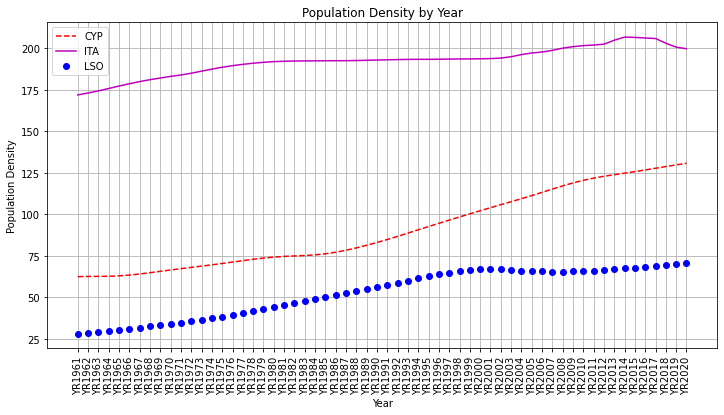

In [141]:
cls = df1.columns.tolist()
plt.figure(figsize=(12,6))
plt.title('Population Density by Year')
plt.plot(df1[cls[0]],"r--",label=cls[0])
plt.plot(df1[cls[1]],"m-",label=cls[1])
plt.plot(df1[cls[2]],"bo",label=cls[2])
plt.xlabel("Year")
plt.xticks(rotation=90)
plt.ylabel("Population Density")
plt.legend(loc='best')
plt.grid()
plt.show()

In [142]:
df2 = wb.data.DataFrame(ind2, country_codes, mrv=60).T
df2 = df2.fillna(df2.mean())
df2.head()

economy,CYP,ITA,LSO
YR2000,5.308001,7.566656,5.611770
YR2001,5.339405,7.737608,7.277459
YR2002,5.615660,7.866935,6.745242
YR2003,5.635688,7.832977,6.045508
YR2004,5.405581,8.165493,6.057389


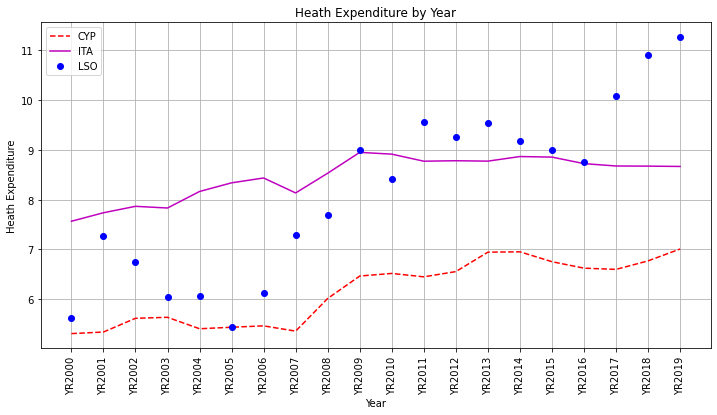

In [143]:
cls2=df2.columns.tolist()
plt.figure(figsize=(12,6))
plt.title('Heath Expenditure by Year')
plt.plot(df2[cls2[0]],"r--",label=cls2[0])
plt.plot(df2[cls2[1]],"m-",label=cls2[1])
plt.plot(df2[cls2[2]],"bo",label=cls2[2])
plt.xlabel("Year")
plt.xticks(rotation=90)
plt.ylabel("Heath Expenditure")
plt.legend(loc='best')
plt.grid()
plt.show()

In [144]:
"function for data normalization for the best fit"
def normal(data):
    minmax=MinMaxScaler()
    nrm=minmax.fit_transform(data)
    return nrm
nrml=normal(df1.values)

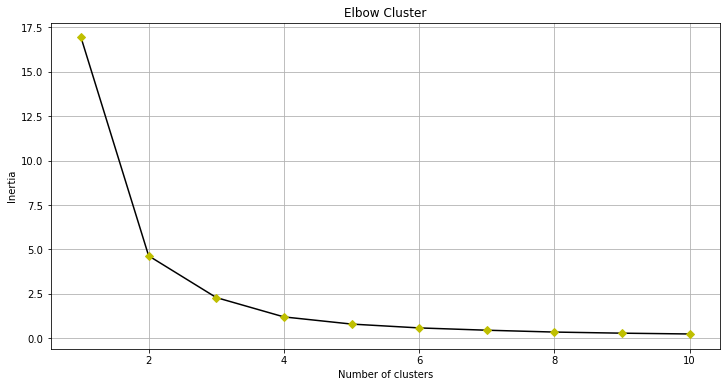

In [145]:
lst = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300,  random_state=0)
    kmeans.fit(nrml)
    lst.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.title('Elbow Cluster')
plt.plot(range(1, 11), lst,"k-")
plt.plot(range(1, 11), lst,"Dy")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [146]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit(nrml)

In [147]:
kmeans.cluster_centers_

array([[0.78373119, 0.79184532, 0.91377977],
       [0.04928985, 0.26451068, 0.1176955 ],
       [0.26236087, 0.59077254, 0.5638924 ]])

In [148]:
lbl=[]
for i in kmeans.labels_:
    if i==0:
        lbl.append(cls[0])
    elif i==1:
        lbl.append(cls[1])
    elif i==2:
        lbl.append(cls[2])
lbl1=np.array(lbl)

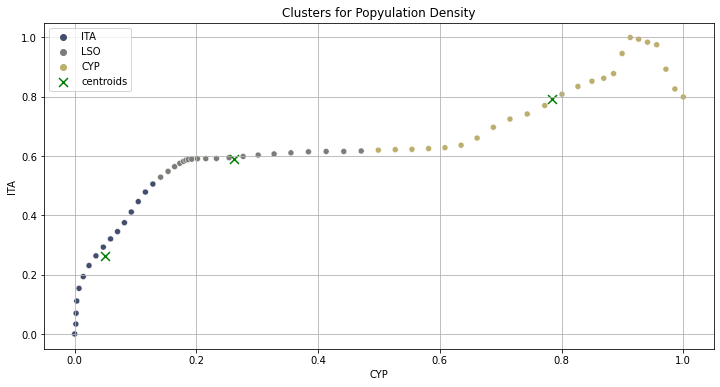

In [149]:
df = pd.DataFrame(norml,columns=cls)
plt.figure(figsize=(12,6))
plt.title('Clusters for Popyulation Density')
sns.scatterplot(data=df, x=cls[0], y=cls[1], hue=lbl1,palette="cividis")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="x", c="g", s=80, label="centroids")
plt.grid()
plt.legend()
plt.show()

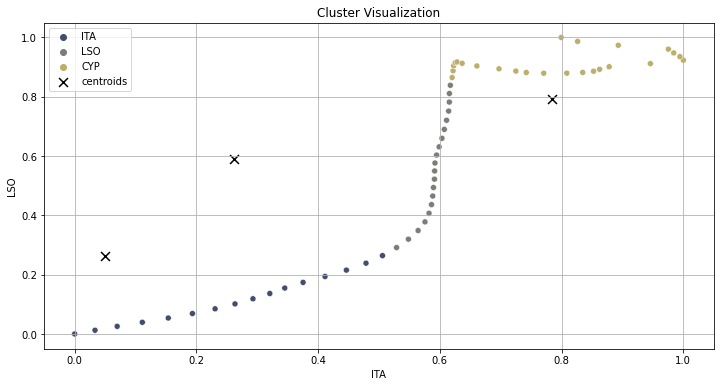

In [150]:
plt.figure(figsize=(12,6))
plt.title('Cluster Visualization')
sns.scatterplot(data=df, x=cls[1], y=cls[2], hue=lbl1,palette="cividis")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="x", c="k", s=80, label="centroids")
plt.grid()
plt.legend()
plt.show()

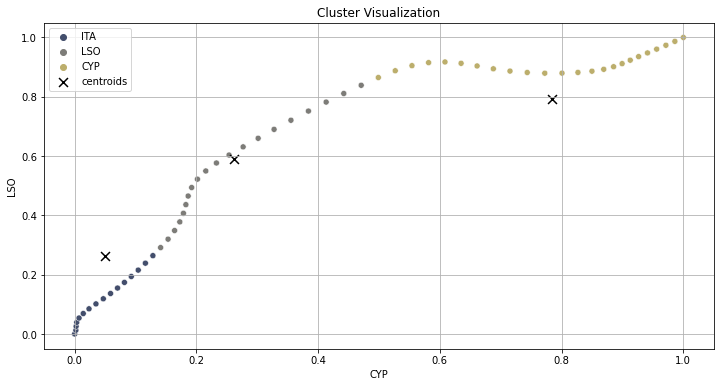

In [162]:
plt.figure(figsize=(12,6))
plt.title('Cluster Visualization')
sns.scatterplot(data=df, x=cls[0], y=cls[2], hue=lbl1,palette="cividis")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="x", c="k", s=80, label="centroids")
plt.grid()
plt.legend()
plt.show()

## Curve Fitting

In [152]:
from scipy.optimize import curve_fit

In [153]:
 "defining the function for curve fitting and display of data"
    def func(x,k,t,s):
    return (k+x*t)*6*s

In [154]:
x = df2.values.astype(float)[:,0]
x

array([5.30800056, 5.33940458, 5.61565971, 5.63568783, 5.40558147,
       5.43580961, 5.46357489, 5.35744858, 6.01427698, 6.46531582,
       6.51767111, 6.44928503, 6.55474567, 6.94518471, 6.95228958,
       6.75352287, 6.62359428, 6.59893894, 6.77018547, 7.00903225])

In [155]:
y = func(x, 1.5, 0.9, 0.5)
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=df2.values[:,0].size)
ydata = y + y_noise

In [156]:
ydata

array([18.83124676, 19.01896393, 19.77003704, 19.46571142, 18.95876317,
       19.27148985, 19.26032718, 18.79871741, 20.54538191, 21.50361192,
       22.18989155, 22.0447363 , 22.57360063, 23.21198602, 23.3473004 ,
       22.76101518, 22.53801106, 22.40271045, 22.88720527, 23.4715252 ])

In [157]:
popt, pcov = curve_fit(func, df2.values[:,0], ydata)

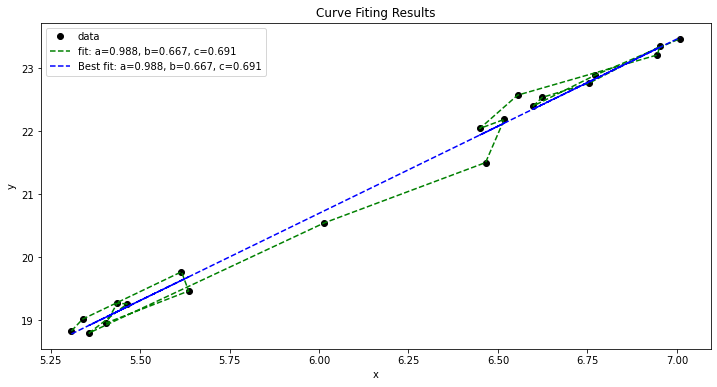

In [158]:
plt.figure(figsize=(12,6))
plt.title('Curve Fiting Results')
plt.plot(df2.values[:,0], ydata, 'ko', label='data')
plt.plot(df2.values[:,0], ydata, 'g--',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(df2.values[:,0],func(df2.values[:,0], *popt), 'b--',label='Best fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()